In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import ast

# Load the dataset
df = pd.read_csv('cleaned_ember_dataset2.csv')


In [2]:
df.head()

,sha256,appeared,label,histogram,byteentropy,strings,general,header,section,imports,exports
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,2006-12,0,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 14573, 'avlength': 5.9720716393...","{'size': 3101705, 'vsize': 380928, 'has_debug'...","{'coff': {'timestamp': 1124149349, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['SetFileTime', 'CompareFileT...",[]
1,d4206650743b3d519106dea10a38a55c30467c3d9f7875...,2006-12,0,"[89698, 17443, 13695, 12921, 11428, 8866, 9528...","[65236, 16, 24, 13, 28, 11, 121, 40, 5, 7, 5, ...","{'numstrings': 4385, 'avlength': 6.35712656784...","{'size': 1240795, 'vsize': 1318912, 'has_debug...","{'coff': {'timestamp': 708992537, 'machine': '...","{'entry': 'UPX0', 'sections': [{'name': 'UPX0'...","{'KERNEL32.DLL': ['LoadLibraryA', 'GetProcAddr...",[]
2,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,2007-01,0,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 1803, 'avlength': 11.1913477537...","{'size': 504320, 'vsize': 524288, 'has_debug':...","{'coff': {'timestamp': 1091600092, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...",{'ADVAPI32.dll': ['ConvertStringSecurityDescri...,[]
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,2007-02,0,"[21315, 9641, 9332, 9358, 9598, 9220, 9146, 93...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 11166, 'avlength': 5.8078989790...","{'size': 2377730, 'vsize': 77824, 'has_debug':...","{'coff': {'timestamp': 708992537, 'machine': '...","{'entry': 'CODE', 'sections': [{'name': 'CODE'...","{'kernel32.dll': ['DeleteCriticalSection', 'Le...",[]
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,2007-02,0,"[23539, 6015, 5214, 4727, 4892, 4649, 4367, 52...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 5547, 'avlength': 6.04344690823...","{'size': 1153808, 'vsize': 1167360, 'has_debug...","{'coff': {'timestamp': 938258311, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegCloseKey', 'AllocateAndI...",[]


In [3]:
# Identify columns that contain string representations of lists (e.g., 'histogram', 'byteentropy')
columns_with_lists = ['histogram', 'byteentropy']  # Add more columns as needed

# Convert the string-encoded lists into actual lists
for col in columns_with_lists:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Check the conversion
print(df.head())


                                              sha256 appeared  label  \
0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12      0   
1  d4206650743b3d519106dea10a38a55c30467c3d9f7875...  2006-12      0   
2  c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...  2007-01      0   
3  7f513818bcc276c531af2e641c597744da807e21cc1160...  2007-02      0   
4  ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...  2007-02      0   

                                           histogram  \
0  [45521, 13095, 12167, 12496, 12429, 11709, 118...   
1  [89698, 17443, 13695, 12921, 11428, 8866, 9528...   
2  [93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...   
3  [21315, 9641, 9332, 9358, 9598, 9220, 9146, 93...   
4  [23539, 6015, 5214, 4727, 4892, 4649, 4367, 52...   

                                         byteentropy  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [65236, 16, 24, 13, 28, 11, 121, 40, 5, 7, 5, ...   
2  [47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...   
3  [0,

In [4]:
# Select columns for scaling (excluding labels or categorical columns)
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=[float, int]).columns  # Select numeric columns only

# Scale the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Check the scaled data
print(df.head())


                                              sha256 appeared  label  \
0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12    0.0   
1  d4206650743b3d519106dea10a38a55c30467c3d9f7875...  2006-12    0.0   
2  c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...  2007-01    0.0   
3  7f513818bcc276c531af2e641c597744da807e21cc1160...  2007-02    0.0   
4  ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...  2007-02    0.0   

                                           histogram  \
0  [45521, 13095, 12167, 12496, 12429, 11709, 118...   
1  [89698, 17443, 13695, 12921, 11428, 8866, 9528...   
2  [93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...   
3  [21315, 9641, 9332, 9358, 9598, 9220, 9146, 93...   
4  [23539, 6015, 5214, 4727, 4892, 4649, 4367, 52...   

                                         byteentropy  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [65236, 16, 24, 13, 28, 11, 121, 40, 5, 7, 5, ...   
2  [47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...   
3  [0,

In [5]:
# Flatten the 'histogram', 'byteentropy', 'imports', 'exports', and 'strings' columns into separate columns
histogram_df = pd.DataFrame(df['histogram'].tolist(), index=df.index).add_prefix('histogram_')
byteentropy_df = pd.DataFrame(df['byteentropy'].tolist(), index=df.index).add_prefix('byteentropy_')

# Depending on the nature of 'imports', 'exports', and 'strings', you might need to handle them similarly
imports_df = pd.DataFrame(df['imports'].tolist(), index=df.index).add_prefix('imports_')
exports_df = pd.DataFrame(df['exports'].tolist(), index=df.index).add_prefix('exports_')
strings_df = pd.DataFrame(df['strings'].tolist(), index=df.index).add_prefix('strings_')

# Concatenate the flattened columns back to the main dataframe
df_flattened = pd.concat([df, histogram_df, byteentropy_df, imports_df, exports_df, strings_df], axis=1)

# Drop the original list columns as they are now represented by the flattened columns
df_flattened = df_flattened.drop(['histogram', 'byteentropy', 'imports', 'exports', 'strings'], axis=1)

# Now you have a flattened dataframe with individual numerical columns.
print(df_flattened.head())



                                              sha256 appeared  label  \
0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12    0.0   
1  d4206650743b3d519106dea10a38a55c30467c3d9f7875...  2006-12    0.0   
2  c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...  2007-01    0.0   
3  7f513818bcc276c531af2e641c597744da807e21cc1160...  2007-02    0.0   
4  ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...  2007-02    0.0   

                                             general  \
0  {'size': 3101705, 'vsize': 380928, 'has_debug'...   
1  {'size': 1240795, 'vsize': 1318912, 'has_debug...   
2  {'size': 504320, 'vsize': 524288, 'has_debug':...   
3  {'size': 2377730, 'vsize': 77824, 'has_debug':...   
4  {'size': 1153808, 'vsize': 1167360, 'has_debug...   

                                              header  \
0  {'coff': {'timestamp': 1124149349, 'machine': ...   
1  {'coff': {'timestamp': 708992537, 'machine': '...   
2  {'coff': {'timestamp': 1091600092, 'machine': ...   
3  {'c

In [6]:
# Select all numeric columns for scaling
numeric_columns = df_flattened.select_dtypes(include=[float, int]).columns  # Select only numeric columns

# Apply MinMaxScaler to normalize only the numeric features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_flattened[numeric_columns])

# Convert back to a DataFrame for easier handling (optional)
scaled_features_df = pd.DataFrame(scaled_features, columns=numeric_columns)

# The labels remain unchanged
labels = df['label'].values.reshape(-1, 1)

# Now scaled_features_df contains your scaled data, and 'labels' contains the corresponding labels.
print(scaled_features_df.head())


   label  histogram_0  histogram_1  histogram_2  histogram_3  histogram_4  \
0    0.0     0.001720     0.000622     0.007965     0.006685     0.008178   
1    0.0     0.003405     0.000829     0.008966     0.006912     0.007519   
2    0.0     0.003533     0.000750     0.001879     0.001608     0.002702   
3    0.0     0.000796     0.000458     0.006109     0.005006     0.006315   
4    0.0     0.000881     0.000286     0.003413     0.002529     0.003219   

   histogram_5  histogram_6  histogram_7  histogram_8  ...  byteentropy_246  \
0     0.007492     0.007535     0.007442     0.007261  ...         0.007188   
1     0.005673     0.006052     0.005893     0.005796  ...         0.002319   
2     0.001133     0.001853     0.002661     0.002599  ...         0.000268   
3     0.005899     0.005809     0.005791     0.005279  ...         0.005632   
4     0.002975     0.002774     0.003271     0.003171  ...         0.002628   

   byteentropy_247  byteentropy_248  byteentropy_249  byteentr

In [7]:
# Keep non-numeric columns separately
non_numeric_columns = df_flattened.select_dtypes(exclude=[float, int]).columns
non_numeric_data = df_flattened[non_numeric_columns]

# Merge non-numeric data back after scaling if necessary
final_df = pd.concat([scaled_features_df, non_numeric_data], axis=1)

# Now final_df contains both scaled numeric features and original non-numeric data
print(final_df.head())


   label  histogram_0  histogram_1  histogram_2  histogram_3  histogram_4  \
0    0.0     0.001720     0.000622     0.007965     0.006685     0.008178   
1    0.0     0.003405     0.000829     0.008966     0.006912     0.007519   
2    0.0     0.003533     0.000750     0.001879     0.001608     0.002702   
3    0.0     0.000796     0.000458     0.006109     0.005006     0.006315   
4    0.0     0.000881     0.000286     0.003413     0.002529     0.003219   

   histogram_5  histogram_6  histogram_7  histogram_8  ...  byteentropy_254  \
0     0.007492     0.007535     0.007442     0.007261  ...         0.007020   
1     0.005673     0.006052     0.005893     0.005796  ...         0.002083   
2     0.001133     0.001853     0.002661     0.002599  ...         0.000255   
3     0.005899     0.005809     0.005791     0.005279  ...         0.005479   
4     0.002975     0.002774     0.003271     0.003171  ...         0.002554   

   byteentropy_255                                            

In [8]:
df.shape

(50000, 11)

In [9]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.17.0


In [10]:
from tensorflow import keras
print("Keras Version:", keras.__version__)


Keras Version: 3.5.0


In [11]:
#Generator Architecture
import tensorflow as tf
from tensorflow.keras import layers

def build_generator(latent_dim, output_dim):
    model = tf.keras.Sequential()
    
    # Input layer (latent space)
    model.add(layers.Dense(256, activation='relu', input_dim=latent_dim))
    model.add(layers.BatchNormalization())  # Normalize activations for stability
    
    # Hidden layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.BatchNormalization())
    
    # Output layer (same dimensions as the numeric feature columns)
    model.add(layers.Dense(output_dim, activation='sigmoid'))  # Sigmoid activation to match the normalized feature range
    
    return model

# Example usage:
latent_dim = 100  # Dimension of the noise input
output_dim = scaled_features_df.shape[1]  # Output dimensions should match the number of numeric columns (e.g., 512)
generator = build_generator(latent_dim, output_dim)
generator.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 513)            │       525,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,215,745 (4.64 MB)

 Trainable params: 1,212,161 (4.62 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [12]:
#Discriminator Architecture
def build_discriminator(input_dim):
    model = tf.keras.Sequential()
    
    # Input layer (feature space)
    model.add(layers.Dense(1024, activation='relu', input_dim=input_dim))
    model.add(layers.Dropout(0.3))  # Dropout for regularization
    
    # Hidden layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    
    # Output layer (binary classification: real or fake)
    model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification (real/fake)
    
    return model

# Example usage:
discriminator = build_discriminator(output_dim)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1024)           │       526,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,182,721 (4.51 MB)

 Trainable params: 1,182,721 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#GAN Architecture
def build_gan(generator, discriminator):
    # Freeze the discriminator's weights when training the generator
    discriminator.trainable = False
    
    # GAN Input (random noise)
    gan_input = layers.Input(shape=(latent_dim,))
    
    # Generator output (fake data)
    generated_data = generator(gan_input)
    
    # Discriminator output (real/fake)
    gan_output = discriminator(generated_data)
    
    # GAN Model (combines generator and discriminator)
    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    
    return gan

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 513)            │     1,215,745 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │     1,182,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,398,466 (9.15 MB)

 Trainable params: 1,212,161 (4.62 MB)

 Non-trainable params: 1,186,305 (4.53 MB)

In [14]:
#Training the GAN
import numpy as np

def train_gan(gan, generator, discriminator, real_data, latent_dim, epochs=100, batch_size=64):
    for epoch in range(epochs):
        # 1. Train the discriminator with real data
        idx = np.random.randint(0, real_data.shape[0], batch_size)
        real_samples = real_data[idx]
        
        # Generate fake samples
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_samples = generator.predict(noise)
        print(f"Real data shape: {real_samples.shape}")  # Should be (batch_size, 513)
        print(f"Generated data shape: {fake_samples.shape}")  # Should be (batch_size, 513)
        print(f"Batch size: {batch_size}")        
        # Train discriminator (real labeled as 1, fake labeled as 0)
        d_loss_real = discriminator.train_on_batch(real_samples, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((batch_size, 1)))
        
        # 2. Train the generator (through the GAN model, with discriminator's weights frozen)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))  # Labels for valid (all real) samples
        g_loss = gan.train_on_batch(noise, valid_labels)
        
        # Output progress every 1000 epochs
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss real: {d_loss_real[0]}, D loss fake: {d_loss_fake[0]}] [G loss: {g_loss}]")
        if real_samples.shape[0] == 0 or fake_samples.shape[0] == 0:
         print("Error: Empty batch detected!")
         # Print the losses after every few epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: [D loss real: {d_loss_real}] [D loss fake: {d_loss_fake}] [G loss: {g_loss}]")



# Assuming scaled_features_df contains the preprocessed numeric data
train_gan(gan, generator, discriminator, scaled_features_df.values, latent_dim)



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Real data shape: (64, 513)
Generated data shape: (64, 513)
Batch size: 64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss real: 0.6949076652526855, D loss fake: 0.6495237946510315] [G loss: [array(0.6495238, dtype=float32), array(0.6495238, dtype=float32), array(0.4453125, dtype=float32)]]
Epoch 0: [D loss real: [array(0.69490767, dtype=float32), array(0.203125, dtype=float32)]] [D loss fake: [array(0.6495238, dtype=float32), array(0.4453125, dtype=float32)]] [G loss: [array(0.6495238, dtype=float32), array(0.6495238, dtype=float32), array(0.4453125, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Real data shape: (64, 513)
Generated data shape: (64, 513)
Batch size: 64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Real data shape: (64, 513)
Generated data shape: (64, 513)
Batch size: 64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Real data shape: (64, 513)
Generated data shape: (64, 513)
Batch size: 64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Real data shape: (64, 513)
Generated data shape: (64, 513)
Batch size: 64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Real data shape: (64, 513)
Generated data shape: (64, 513

In [15]:
#Generate samples from the latent space
import numpy as np

# Number of synthetic samples you want to generate
num_samples = 20  # You can increase this to generate more samples

# Generate random noise (latent space) of shape (num_samples, latent_dim)
latent_dim = 100  # This is the same as the input dimension to your generator
noise = np.random.normal(0, 1, (num_samples, latent_dim))

# Use the trained generator to create synthetic PE samples
synthetic_samples = generator.predict(noise)

# Check the shape of the generated samples (should be num_samples x 513)
print("Generated synthetic samples shape:", synthetic_samples.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Generated synthetic samples shape: (20, 513)


In [16]:
#Map the Synthetic Samples Back to Original Scale
from sklearn.preprocessing import MinMaxScaler

# Assuming 'scaler' is the MinMaxScaler used to normalize your real data during preprocessing
# Inverse transform the generated synthetic samples to original scale
synthetic_samples_original_scale = scaler.inverse_transform(synthetic_samples)

# Check the first few synthetic samples in their original scale
print("Synthetic samples (original scale):\n", synthetic_samples_original_scale[:5])


Synthetic samples (original scale):
 [[2.01609299e-01 7.50825750e+06 7.15209000e+06 ... 2.57152350e+06
  2.18452580e+07 4.42689360e+07]
 [6.54612064e-01 4.24796350e+06 9.75511200e+06 ... 2.37530760e+07
  1.38832100e+07 2.78198880e+07]
 [7.03220248e-01 4.59573300e+06 8.25943600e+06 ... 3.40268800e+07
  4.50878920e+07 3.85789280e+07]
 [5.73217750e-01 3.27751875e+06 1.58252230e+07 ... 3.65945320e+07
  3.64386840e+07 1.04695760e+07]
 [1.06000364e-01 2.47827075e+06 1.19512140e+07 ... 1.76494360e+07
  2.11510660e+07 4.30593560e+07]]


In [17]:
#Save or Analyze the Generated PE Samples

import pandas as pd

# Convert the synthetic samples to a DataFrame (optional, for easier analysis)
synthetic_df = pd.DataFrame(synthetic_samples_original_scale, columns=scaled_features_df.columns)

# Save the synthetic samples to a CSV file (optional)
synthetic_df.to_csv('synthetic_pe_samples.csv', index=False)

# Check the first few rows of the generated synthetic samples
print(synthetic_df.head())


      label  histogram_0  histogram_1   histogram_2   histogram_3  \
0  0.201609   7508257.50    7152090.0  1.378936e+06  5.865865e+05   
1  0.654612   4247963.50    9755112.0  2.172518e+05  1.228103e+06   
2  0.703220   4595733.00    8259436.0  1.487602e+05  1.182947e+06   
3  0.573218   3277518.75   15825223.0  2.436245e+05  7.192902e+05   
4  0.106000   2478270.75   11951214.0  1.119225e+06  3.790871e+05   

    histogram_4   histogram_5   histogram_6   histogram_7   histogram_8  ...  \
0  1.249755e+06  1.544413e+06  1.197169e+06  1.594044e+06  7.715044e+05  ...   
1  5.391494e+05  1.905472e+05  1.076748e+06  8.762576e+05  3.146368e+05  ...   
2  4.045563e+05  2.203011e+05  8.917901e+05  6.090549e+05  5.724587e+05  ...   
3  6.732219e+05  1.565392e+05  6.105774e+05  5.232956e+05  9.356846e+05  ...   
4  6.763005e+05  1.122245e+06  1.323456e+06  1.523074e+06  1.397114e+06  ...   

   byteentropy_246  byteentropy_247  byteentropy_248  byteentropy_249  \
0       51631100.0       514715

In [18]:
# Inverse transform the synthetic samples to bring them back to the original scale
synthetic_samples_original_scale = scaler.inverse_transform(synthetic_samples)

# Check the first few rows to ensure the scaling is correct
print(synthetic_samples_original_scale[:5])


[[2.01609299e-01 7.50825750e+06 7.15209000e+06 ... 2.57152350e+06
  2.18452580e+07 4.42689360e+07]
 [6.54612064e-01 4.24796350e+06 9.75511200e+06 ... 2.37530760e+07
  1.38832100e+07 2.78198880e+07]
 [7.03220248e-01 4.59573300e+06 8.25943600e+06 ... 3.40268800e+07
  4.50878920e+07 3.85789280e+07]
 [5.73217750e-01 3.27751875e+06 1.58252230e+07 ... 3.65945320e+07
  3.64386840e+07 1.04695760e+07]
 [1.06000364e-01 2.47827075e+06 1.19512140e+07 ... 1.76494360e+07
  2.11510660e+07 4.30593560e+07]]


2478270.8 23631776.0


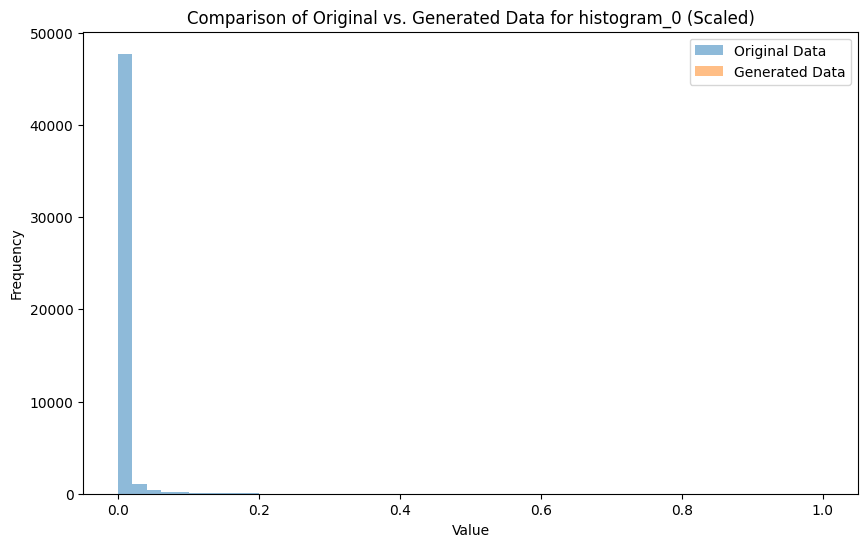

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Check for extreme values in generated data
print(synthetic_samples_original_scale[:, 1].min(), synthetic_samples_original_scale[:, 1].max())

# Scale the generated data to the same range as original data
synthetic_scaled = (synthetic_samples_original_scale[:, 1] - synthetic_samples_original_scale[:, 1].min()) / (synthetic_samples_original_scale[:, 1].max() - synthetic_samples_original_scale[:, 1].min())
original_scaled = (scaled_features_df['histogram_0'] - scaled_features_df['histogram_0'].min()) / (scaled_features_df['histogram_0'].max() - scaled_features_df['histogram_0'].min())

# Plot histogram for the first feature 'histogram_0' in the original and generated data
plt.figure(figsize=(10, 6))
plt.hist(original_scaled, bins=50, alpha=0.5, label='Original Data')
plt.hist(synthetic_scaled, bins=50, alpha=0.5, label='Generated Data')
plt.title('Comparison of Original vs. Generated Data for histogram_0 (Scaled)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [20]:
print(synthetic_scaled.min(), synthetic_scaled.max())


0.0 1.0


(array([2., 0., 0., 2., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.01      , 0.02      , 0.03      , 0.04      ,
        0.05      , 0.06      , 0.07      , 0.08      , 0.09      ,
        0.1       , 0.11      , 0.12      , 0.13      , 0.14      ,
        0.15000001, 0.16      , 0.17      , 0.18000001, 0.19      ,
        0.2       , 0.20999999, 0.22      , 0.23      , 0.23999999,
        0.25      , 0.25999999, 0.27000001, 0.28      , 0.28999999,
        0.30000001, 0.31      , 0.31999999, 0.33000001, 0.34      ,
        0.34999999, 0.36000001, 0.37      , 0.38      , 0.38999999,
      

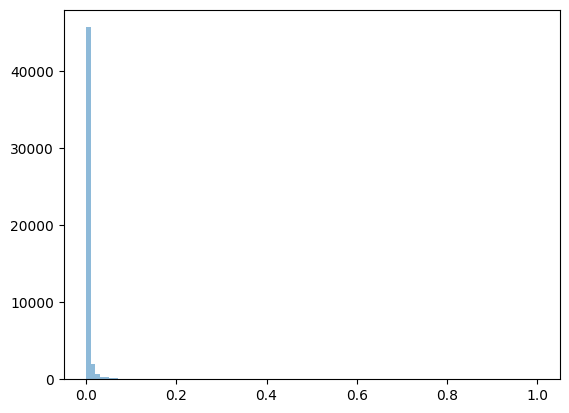

In [21]:
plt.hist(original_scaled, bins=100, alpha=0.5, label='Original Data')
plt.hist(synthetic_scaled, bins=100, alpha=0.5, label='Generated Data')


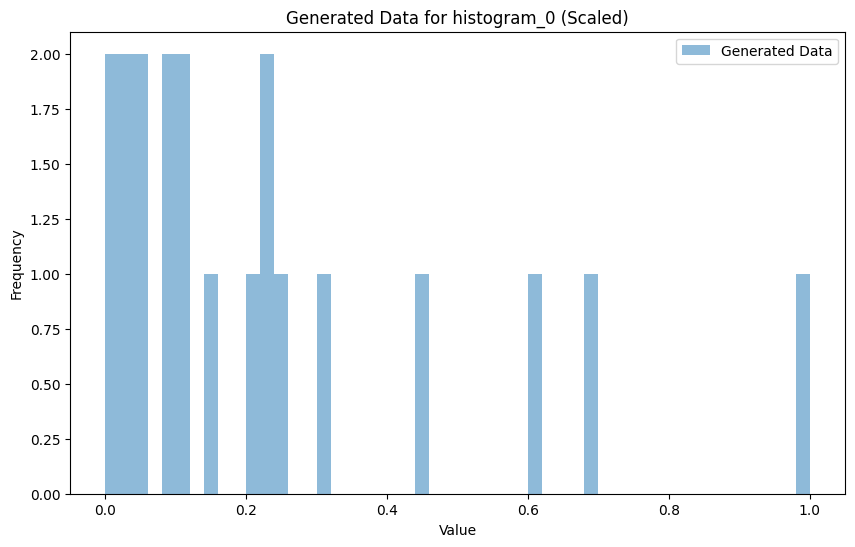

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(synthetic_scaled, bins=50, alpha=0.5, label='Generated Data')
plt.title('Generated Data for histogram_0 (Scaled)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GaussianNoise, BatchNormalization, Dense, LeakyReLU
from tensorflow.keras.models import Sequential

# Adjusted generator architecture with Batch Normalization
def create_generator(latent_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(513, activation='sigmoid'))  # Adjust output layer as per your features
    return model

# Adjusted discriminator with Gaussian Noise
def create_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(1024, input_dim=input_dim))
    model.add(GaussianNoise(0.1))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(GaussianNoise(0.1))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(GaussianNoise(0.1))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Compile with updated learning rates and optimizers
generator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = Adam(learning_rate=0.0001, beta_1=0.5)

generator = create_generator(latent_dim)
discriminator = create_discriminator(input_dim=513)

generator.compile(optimizer=generator_optimizer, loss='binary_crossentropy')
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [28]:
# Updated Discriminator with increased dropout
def create_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(1024, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))  # Increased dropout for regularization
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Update GAN training loop
def train_gan(gan, generator, discriminator, real_data, latent_dim, epochs=1000, batch_size=32, generator_steps=3):
    for epoch in range(epochs):
        # Train the discriminator with real and fake samples
        idx = np.random.randint(0, real_data.shape[0], batch_size)
        real_samples = real_data[idx]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_samples = generator.predict(noise)

        # Smoothing and training
        d_loss_real = discriminator.train_on_batch(real_samples, np.full((batch_size, 1), 0.9))
        d_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((batch_size, 1)))

        # Train generator multiple times per discriminator step
        for _ in range(generator_steps):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Output progress every 100 epochs
        if epoch % 100 == 0:
            print(f"{epoch} [D loss real: {d_loss_real[0]}, D loss fake: {d_loss_fake[0]}] [G loss: {g_loss}]")


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

def evaluate_model(discriminator, real_data, generated_data):
    # Generate predictions from discriminator
    real_labels = np.ones((real_data.shape[0], 1))
    fake_labels = np.zeros((generated_data.shape[0], 1))
    
    real_preds = discriminator.predict(real_data)
    fake_preds = discriminator.predict(generated_data)
    
    # Combine results
    all_preds = np.vstack([real_preds, fake_preds])
    all_labels = np.vstack([real_labels, fake_labels])
    
    # Binarize predictions: anything > 0.5 is real, otherwise fake
    binary_preds = (all_preds > 0.5).astype(int)

    # Accuracy
    acc = accuracy_score(all_labels, binary_preds)
    
    # Confusion Matrix
    cm = confusion_matrix(all_labels, binary_preds)
    
    # F1 Score
    f1 = f1_score(all_labels, binary_preds)

    return acc, cm, f1

# Define batch size and latent dimension (same as used during training)
batch_size = 64  # or whatever batch size you used in training
latent_dim = 100  # or the same latent dimension size you used

# Assuming your GAN model is trained and you have real and generated data
real_data = scaled_features_df.values[:batch_size]  # Get a batch of real data
noise = np.random.normal(0, 1, (batch_size, latent_dim))
generated_data = generator.predict(noise)

accuracy, confusion_mat, f1 = evaluate_model(discriminator, real_data, generated_data)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"F1 Score: {f1}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.484375
Confusion Matrix:
[[ 0 64]
 [ 2 62]]
F1 Score: 0.6526315789473685


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


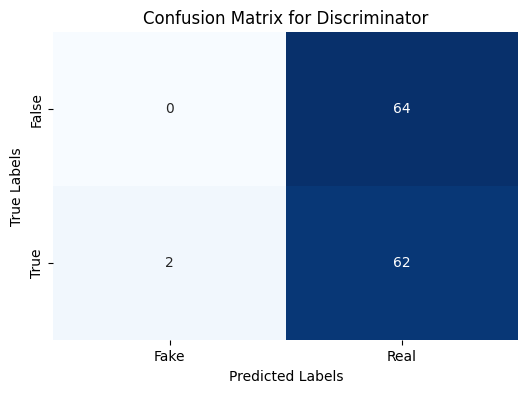

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
# Assuming your GAN model is trained and you have real and generated data
real_data = scaled_features_df.values[:batch_size]  # Get a batch of real data
noise = np.random.normal(0, 1, (batch_size, latent_dim))
generated_data = generator.predict(noise)

# Generate labels for real (1) and fake (0)
real_labels = np.ones((batch_size, 1))
fake_labels = np.zeros((batch_size, 1))

# Predictions from the discriminator
real_predictions = discriminator.predict(real_data)
fake_predictions = discriminator.predict(generated_data)

# Convert predictions to binary labels
real_pred_labels = (real_predictions > 0.5).astype(int)
fake_pred_labels = (fake_predictions > 0.5).astype(int)

# Concatenate true labels and predictions
true_labels = np.vstack((real_labels, fake_labels)).flatten()
pred_labels = np.vstack((real_pred_labels, fake_pred_labels)).flatten()

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fake', 'Real'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Discriminator')
plt.show()
